In [1]:
import numpy as np
import pandas as pd

In [2]:
loan_data_input_train = pd.read_csv('loan_data_input_train.csv',index_col=0)
loan_data_output_train = pd.read_csv('loan_data_output_train.csv',index_col=0)
loan_data_input_test = pd.read_csv('loan_data_input_test.csv',index_col=0)
loan_data_output_test = pd.read_csv('loan_data_output_test.csv',index_col=0)

## Data Exploration

In [3]:
loan_data_input_test.shape

(93257, 318)

In [4]:
loan_data_input_train.shape

(373028, 318)

In [5]:
loan_data_output_train

,good_bad
427211,1
206088,1
136020,1
412305,0
36159,0
...,...
259178,1
365838,1
131932,1
146867,1


In [6]:
loan_data_output_test.head()

,good_bad
362514,1
288564,1
213591,1
263083,1
165001,1


## Selecting the features required for PD modelling

In [7]:
inputs_train_with_ref_cat = loan_data_input_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mnths_since_issue_d:<38',
'mnths_since_issue_d:38-39',
'mnths_since_issue_d:40-41',
'mnths_since_issue_d:42-48',
'mnths_since_issue_d:49-52',
'mnths_since_issue_d:53-64',
'mnths_since_issue_d:65-84',
'mnths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mnths_earliest_cr_line:<140',
'mnths_earliest_cr_line:141-164',
'mnths_earliest_cr_line:165-247',
'mnths_earliest_cr_line:248-270',
'mnths_earliest_cr_line:271-352',
'mnths_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86',
]]

In [8]:
ref_catogery = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mnths_since_issue_d:>84',
'int_rate:>20.281',
'mnths_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [47]:
input_train = inputs_train_with_ref_cat.drop(ref_catogery,axis=1)
# From the dataframe with input variables, we drop the variables with variable names in the list with reference categories. 
input_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,acc_now_delinq:>=1,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
427211,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0


# PD Model Preperation

### Logistic Regression to classify good or bad

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [11]:
model = LogisticRegression()

In [12]:
pd.options.display.max_columns = None

In [13]:
model.fit(input_train,loan_data_output_train)

D:\Users\imhj1\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\imhj1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
model.intercept_

array([-1.04366829])

In [15]:
model.coef_

array([[ 0.48980709,  0.56582485,  0.51283422,  0.43458161,  0.29787694,
         0.10980856,  0.11741712,  0.11291236,  0.02450533,  0.04733908,
         0.0694723 ,  0.04775164,  0.07357904,  0.14128952,  0.10457508,
         0.17774225,  0.23939337,  0.23164917,  0.25890497,  0.33126311,
         0.52047481,  0.13433538,  0.10132188,  0.39095116,  0.29101823,
         0.28730854,  0.33358786,  0.2710269 ,  0.09526578,  0.06595921,
         0.08647274,  0.02966733,  0.03906467,  0.10852221,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.40394407,  0.79063863,  0.45872887,  0.13358871,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.04573238, -0.059873  ,  0.92195533,  0.7492267 ,  0.50981048,
        -0.02259389, -0.07748249, -0.1152317 , -0.12346646, -0.11425079,
        -0.05199628, -0.11704758,  0.13771852,  0.23299849, -0.03137866,
         0.00795117,  0.32511338,  0.11170819,  0.1

In [16]:
feature_name = input_train.columns.values

In [17]:
summary_table = pd.DataFrame(columns=['Feature Name'], data=feature_name)

summary_table['Coefficients'] = np.transpose(model.coef_)
summary_table.index += 1
summary_table.loc[0] = ['Intercept',model.intercept_[0]]
summary_table.sort_index(inplace=True)
summary_table

,Feature Name,Coefficients
0,Intercept,-1.043668
1,grade:A,0.489807
2,grade:B,0.565825
3,grade:C,0.512834
4,grade:D,0.434582
...,...,...
100,mths_since_last_record:3-20,0.732468
101,mths_since_last_record:21-31,0.688393
102,mths_since_last_record:32-80,0.871705
103,mths_since_last_record:81-86,0.414974


### Creating a model to get the Probablity of Default

In [36]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        try:
            Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        except:
            reg = 1e-16
            F_ij_reg = F_ij + reg * np.eye(F_ij.shape[0])
            Cramer_Rao = np.linalg.inv(F_ij_reg)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [37]:
model = LogisticRegression_with_p_values()

In [38]:
model.fit(input_train,loan_data_output_train)

D:\Users\imhj1\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\imhj1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
summary_table = pd.DataFrame(columns=['Feature Name'], data=feature_name)

summary_table['Coefficients'] = np.transpose(model.coef_)
summary_table.index += 1
summary_table.loc[0] = ['Intercept',model.intercept_[0]]
summary_table.sort_index(inplace=True)
summary_table

,Feature Name,Coefficients
0,Intercept,-1.043668
1,grade:A,0.489807
2,grade:B,0.565825
3,grade:C,0.512834
4,grade:D,0.434582
5,grade:E,0.297877
6,grade:F,0.109809
7,home_ownership:OWN,0.117417
8,home_ownership:MORTGAGE,0.112912
9,addr_state:NM_VA,0.024505


In [40]:
p_values =  model.p_values

In [41]:
p_values = np.append(np.nan,np.array(p_values))

In [42]:
summary_table['p_values'] = p_values

In [43]:
pd.options.display.max_rows = None

In [44]:
summary_table

,Feature Name,Coefficients,p_values
0,Intercept,-1.043668,NaN
1,grade:A,0.489807,2.205674e-08
2,grade:B,0.565825,6.061350e-22
3,grade:C,0.512834,1.456723e-20
4,grade:D,0.434582,2.573433e-16
5,grade:E,0.297877,5.119541e-10
6,grade:F,0.109809,2.789176e-02
7,home_ownership:OWN,0.117417,4.762048e-09
8,home_ownership:MORTGAGE,0.112912,2.948676e-19
9,addr_state:NM_VA,0.024505,4.430008e-01


In [45]:
inputs_train_with_ref_cat = loan_data_input_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86',
]]

In [46]:
ref_catogery = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'int_rate:>20.281',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [48]:
input_train = inputs_train_with_ref_cat.drop(ref_catogery,axis=1)
# From the dataframe with input variables, we drop the variables with variable names in the list with reference categories. 
input_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,acc_now_delinq:>=1,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
427211,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0


In [50]:
model2 = LogisticRegression_with_p_values()
model2.fit(input_train,loan_data_output_train)

D:\Users\imhj1\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\imhj1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
feature_name = input_train.columns.values

In [55]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(model2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', model2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.221535
1,grade:A,0.471544
2,grade:B,0.550250
3,grade:C,0.502231
4,grade:D,0.427951
5,grade:E,0.297796
6,grade:F,0.117178
7,home_ownership:OWN,0.118646
8,home_ownership:MORTGAGE,0.111220
9,addr_state:NM_VA,0.022815


In [56]:
# We add the 'p_values' here, just as we did before.
p_values = model2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table
# Here we get the results for our final PD model.

,Feature name,Coefficients,p_values
0,Intercept,-1.221535,NaN
1,grade:A,0.471544,6.742101e-08
2,grade:B,0.550250,5.170328e-21
3,grade:C,0.502231,5.021907e-20
4,grade:D,0.427951,3.774273e-16
5,grade:E,0.297796,2.229618e-10
6,grade:F,0.117178,1.621487e-02
7,home_ownership:OWN,0.118646,3.220839e-09
8,home_ownership:MORTGAGE,0.111220,7.487383e-19
9,addr_state:NM_VA,0.022815,4.742151e-01


In [57]:
import pickle

In [59]:
pickle.dump(model2, open('pd_model.sav', 'wb'))
# Here we export our model to a 'SAV' file with file name 'pd_model.sav'.

# Model Validation

## Out Of Sample testing

In [61]:
inputs_test_with_ref_cat = loan_data_input_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86',
]]

In [62]:
ref_catogery = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'int_rate:>20.281',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [65]:
input_test = inputs_test_with_ref_cat.drop(ref_catogery, axis=1)

In [66]:
y_hat_test = model2.model.predict(input_test)

In [67]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [68]:
y_hat_test_prob = model2.model.predict_proba(input_test)

In [69]:
y_hat_test_prob

array([[0.11396754, 0.88603246],
       [0.1836541 , 0.8163459 ],
       [0.07668516, 0.92331484],
       ...,
       [0.02568167, 0.97431833],
       [0.0504505 , 0.9495495 ],
       [0.04561703, 0.95438297]])

In [71]:
y_hat_test_prob = y_hat_test_prob[:][:,1]

In [72]:
y_hat_test_prob

array([0.88603246, 0.8163459 , 0.92331484, ..., 0.97431833, 0.9495495 ,
       0.95438297])

In [73]:
loan_data_output_test_temp = loan_data_output_test

In [75]:
loan_data_output_test_temp.reset_index(drop=True, inplace=True)

In [76]:
df_act_pred = pd.concat([loan_data_output_test,pd.DataFrame(y_hat_test_prob)],axis=1)

In [77]:
df_act_pred.shape

(93257, 2)

In [79]:
df_act_pred.head()

,good_bad,0
0,1,0.886032
1,1,0.816346
2,1,0.923315
3,1,0.911383
4,1,0.968181


In [80]:
df_act_pred.columns = ['actual_test','y_hat_prob']

In [81]:
df_act_pred.index = loan_data_output_test.index

In [82]:
df_act_pred.head()

,actual_test,y_hat_prob
0,1,0.886032
1,1,0.816346
2,1,0.923315
3,1,0.911383
4,1,0.968181


## Accuracy and Area under the curve

In [83]:
threshold = 0.5

In [84]:
df_act_pred['y_hat'] = np.where(df_act_pred['y_hat_prob']>threshold,1,0)

In [130]:
#Making Confusion Matrix
temp = pd.crosstab(df_act_pred['actual_test'],df_act_pred['y_hat'],
           rownames=['Actual'], colnames=['Predicted'])/df_act_pred.shape[0]

In [131]:
temp

Predicted,0,1
Actual,,
0,0.003764,0.105504
1,0.008042,0.882690


In [102]:
from sklearn.metrics import roc_curve, roc_auc_score

In [137]:
def confusion_matrix(df_act_pred,threshold):
    df_act_pred['y_hat'] = np.where(df_act_pred['y_hat_prob']>threshold,1,0)
    df = pd.crosstab(df_act_pred['actual_test'],df_act_pred['y_hat'],
           rownames=['Actual'], colnames=['Predicted'])/df_act_pred.shape[0]
    display(df)
    accuracy = df.iloc[0,0] + df.iloc[1,1]
    precision = df.iloc[1,1]/(df.iloc[1,1] + df.iloc[0,1])
    print(f'accuracy is {round(accuracy,3)}')
    print(f'precision is {round(precision,3)}')

    return 

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [138]:
fpr, tpr, thresholds = roc_curve(df_act_pred['actual_test'],df_act_pred['y_hat_prob'])   

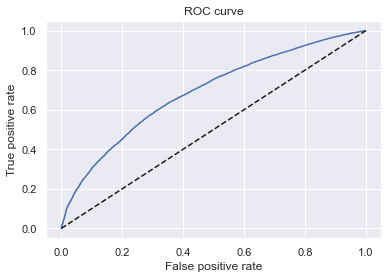

In [143]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [144]:
AUROC = roc_auc_score(df_act_pred['actual_test'],df_act_pred['y_hat_prob'])
AUROC

0.6897254457434381

In [146]:
threshold=0.5
for i in range(10):
    print(f'\nThreshold is {round(threshold,3)}')
    confusion_matrix(df_act_pred,threshold)
    threshold += 0.05


Threshold is 0.5


Predicted,0,1
Actual,,
0,0.000043,0.109225
1,0.000043,0.890689


accuracy is 0.891
precision is 0.891

Threshold is 0.55


Predicted,0,1
Actual,,
0,0.000054,0.109214
1,0.000204,0.890528


accuracy is 0.891
precision is 0.891

Threshold is 0.6


Predicted,0,1
Actual,,
0,0.000300,0.108968
1,0.000579,0.890153


accuracy is 0.89
precision is 0.891

Threshold is 0.65


Predicted,0,1
Actual,,
0,0.001137,0.108131
1,0.002241,0.888491


accuracy is 0.89
precision is 0.892

Threshold is 0.7


Predicted,0,1
Actual,,
0,0.003764,0.105504
1,0.008042,0.882690


accuracy is 0.886
precision is 0.893

Threshold is 0.75


Predicted,0,1
Actual,,
0,0.010380,0.098888
1,0.026175,0.864557


accuracy is 0.875
precision is 0.897

Threshold is 0.8


Predicted,0,1
Actual,,
0,0.023794,0.085473
1,0.074043,0.816689


accuracy is 0.84
precision is 0.905

Threshold is 0.85


Predicted,0,1
Actual,,
0,0.048211,0.061057
1,0.184329,0.706403


accuracy is 0.755
precision is 0.92

Threshold is 0.9


Predicted,0,1
Actual,,
0,0.079672,0.029596
1,0.401600,0.489132


accuracy is 0.569
precision is 0.943

Threshold is 0.95


Predicted,0,1
Actual,,
0,0.103242,0.006026
1,0.707314,0.183418


accuracy is 0.287
precision is 0.968


### Gini and Kolmogorov-Smirnov

In [147]:
df_act_pred.sort_values('y_hat_prob',inplace=True)

In [148]:
df_act_pred.head()

,actual_test,y_hat_prob,y_hat
14868,1,0.391858,0
58288,1,0.405587,0
48752,0,0.412695,0
67123,0,0.453714,0
3525,0,0.469547,0


In [149]:
df_act_pred.tail()

,actual_test,y_hat_prob,y_hat
79625,1,0.988929,1
16899,1,0.989266,1
92691,1,0.989785,1
54837,1,0.989869,1
26378,1,0.990213,1


In [150]:
df_act_pred.reset_index(drop=True,inplace=True)

In [152]:
df_act_pred.head()

,actual_test,y_hat_prob,y_hat
0,1,0.391858,0
1,1,0.405587,0
2,0,0.412695,0
3,0,0.453714,0
4,0,0.469547,0


In [193]:
df_act_pred['Cummulative N Population'] = df_act_pred.index + 1
df_act_pred['Cummulative N Good'] = df_act_pred['actual_test'].cumsum()
df_act_pred['Cummulative N Bad'] = df_act_pred['Cummulative N Population'] - df_act_pred['Cummulative N Good']

In [194]:
df_act_pred.head()

,actual_test,y_hat_prob,y_hat,Cummulative N Population,Cummulative N Good,Cummulative N Bad,Cummulative perc Population,Cummulative perc Good,Cummulative perc Bad
0,1,0.391858,0,1,1,0,0.000011,0.0,0.000098
1,1,0.405587,0,2,2,0,0.000021,0.0,0.000196
2,0,0.412695,0,3,2,1,0.000032,0.0,0.000294
3,0,0.453714,0,4,2,2,0.000043,0.0,0.000393
4,0,0.469547,0,5,2,3,0.000054,0.0,0.000491


In [195]:
df_act_pred.tail()

,actual_test,y_hat_prob,y_hat,Cummulative N Population,Cummulative N Good,Cummulative N Bad,Cummulative perc Population,Cummulative perc Good,Cummulative perc Bad
93252,1,0.988929,1,93253,83063,10190,0.999957,0.212636,7.418057
93253,1,0.989266,1,93254,83064,10190,0.999968,0.212648,7.418057
93254,1,0.989785,1,93255,83065,10190,0.999979,0.212660,7.418057
93255,1,0.989869,1,93256,83066,10190,0.999989,0.212672,7.418057
93256,1,0.990213,1,93257,83067,10190,1.000000,0.212684,7.418057


In [196]:
df_act_pred['Cummulative perc Population'] = df_act_pred['Cummulative N Population'] / df_act_pred.shape[0]
df_act_pred['Cummulative perc Good'] = df_act_pred['Cummulative N Good'] / df_act_pred['actual_test'].sum()
df_act_pred['Cummulative perc Bad'] = df_act_pred['Cummulative N Bad'] / (df_act_pred.shape[0] - df_act_pred['actual_test'].sum())

In [197]:
df_act_pred.head()

,actual_test,y_hat_prob,y_hat,Cummulative N Population,Cummulative N Good,Cummulative N Bad,Cummulative perc Population,Cummulative perc Good,Cummulative perc Bad
0,1,0.391858,0,1,1,0,0.000011,0.000012,0.000000
1,1,0.405587,0,2,2,0,0.000021,0.000024,0.000000
2,0,0.412695,0,3,2,1,0.000032,0.000024,0.000098
3,0,0.453714,0,4,2,2,0.000043,0.000024,0.000196
4,0,0.469547,0,5,2,3,0.000054,0.000024,0.000294


In [198]:
df_act_pred.tail()

,actual_test,y_hat_prob,y_hat,Cummulative N Population,Cummulative N Good,Cummulative N Bad,Cummulative perc Population,Cummulative perc Good,Cummulative perc Bad
93252,1,0.988929,1,93253,83063,10190,0.999957,0.999952,1.0
93253,1,0.989266,1,93254,83064,10190,0.999968,0.999964,1.0
93254,1,0.989785,1,93255,83065,10190,0.999979,0.999976,1.0
93255,1,0.989869,1,93256,83066,10190,0.999989,0.999988,1.0
93256,1,0.990213,1,93257,83067,10190,1.000000,1.000000,1.0


Text(0.5, 1.0, 'Gini')

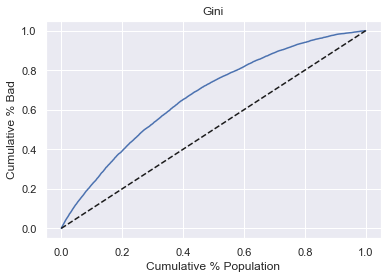

In [199]:
plt.plot(df_act_pred['Cummulative perc Population'],df_act_pred['Cummulative perc Bad'])
plt.plot(df_act_pred['Cummulative perc Population'],df_act_pred['Cummulative perc Population'],linestyle = '--', color='k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [200]:
Gini = AUROC * 2 - 1
Gini

0.37945089148687616

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

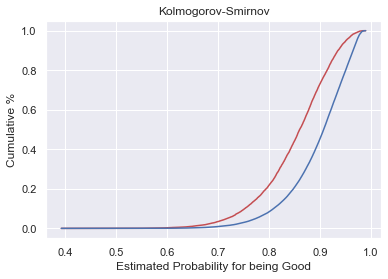

In [201]:
plt.plot(df_act_pred['y_hat_prob'], df_act_pred['Cummulative perc Bad'], color = 'r')
plt.plot(df_act_pred['y_hat_prob'], df_act_pred['Cummulative perc Good'], color = 'b')
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

In [202]:
KS =max(df_act_pred['Cummulative perc Bad'] - df_act_pred['Cummulative perc Good'])
KS

0.2834577602461038

# Creating ScoreCard

In [205]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,total_rev_hi_lim:<=5K,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
362514,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [206]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.221535,NaN
1,grade:A,0.471544,6.742101e-08
2,grade:B,0.550250,5.170328e-21
3,grade:C,0.502231,5.021907e-20
4,grade:D,0.427951,3.774273e-16
5,grade:E,0.297796,2.229618e-10
6,grade:F,0.117178,1.621487e-02
7,home_ownership:OWN,0.118646,3.220839e-09
8,home_ownership:MORTGAGE,0.111220,7.487383e-19
9,addr_state:NM_VA,0.022815,4.742151e-01


In [207]:
y_hat_test_prob

array([0.88603246, 0.8163459 , 0.92331484, ..., 0.97431833, 0.9495495 ,
       0.95438297])

In [208]:
ref_catogery

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:educ__sm_b__wedd__ren_en__mov__house',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'int_rate:>20.281',
 'inq_last_6mths:>6',
 'acc_now_delinq:0',
 'total_rev_hi_lim:<=5K',
 'annual_inc:<20K',
 'dti:>35',
 'mths_since_last_delinq:0-3',
 'mths_since_last_record:0-2']

In [212]:
df_ref_catogery = pd.DataFrame(ref_catogery,columns=['Feature name'])
df_ref_catogery['Coefficient'] = 0
df_ref_catogery['p_values'] = np.nan
df_ref_catogery

,Feature name,Coefficient,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:educ__sm_b__wedd__ren_en__mov__house,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,int_rate:>20.281,0,NaN
9,inq_last_6mths:>6,0,NaN


In [339]:
df_scorecard = pd.concat([summary_table,df_ref_catogery],axis=0)
df_scorecard.reset_index(drop=True,inplace=True)
df_scorecard

,Feature name,Coefficients,p_values,Coefficient
0,Intercept,-1.221535,NaN,NaN
1,grade:A,0.471544,6.742101e-08,NaN
2,grade:B,0.550250,5.170328e-21,NaN
3,grade:C,0.502231,5.021907e-20,NaN
4,grade:D,0.427951,3.774273e-16,NaN
5,grade:E,0.297796,2.229618e-10,NaN
6,grade:F,0.117178,1.621487e-02,NaN
7,home_ownership:OWN,0.118646,3.220839e-09,NaN
8,home_ownership:MORTGAGE,0.111220,7.487383e-19,NaN
9,addr_state:NM_VA,0.022815,4.742151e-01,NaN


In [340]:
df_scorecard['Orginal Feature Name'] = df_scorecard['Feature name'].str.split(':').str[0]
df_scorecard

,Feature name,Coefficients,p_values,Coefficient,Orginal Feature Name
0,Intercept,-1.221535,NaN,NaN,Intercept
1,grade:A,0.471544,6.742101e-08,NaN,grade
2,grade:B,0.550250,5.170328e-21,NaN,grade
3,grade:C,0.502231,5.021907e-20,NaN,grade
4,grade:D,0.427951,3.774273e-16,NaN,grade
5,grade:E,0.297796,2.229618e-10,NaN,grade
6,grade:F,0.117178,1.621487e-02,NaN,grade
7,home_ownership:OWN,0.118646,3.220839e-09,NaN,home_ownership
8,home_ownership:MORTGAGE,0.111220,7.487383e-19,NaN,home_ownership
9,addr_state:NM_VA,0.022815,4.742151e-01,NaN,addr_state


In [341]:
df_scorecard.groupby('Orginal Feature Name')['Coefficients'].min()

Orginal Feature Name
Intercept                -1.221535
acc_now_delinq            0.287866
addr_state                0.022815
annual_inc               -0.088255
dti                      -0.289380
emp_length                0.030455
grade                     0.117178
home_ownership            0.111220
initial_list_status       0.272317
inq_last_6mths            0.535256
int_rate                  0.142053
mths_since_last_delinq    0.083839
mths_since_last_record    0.411062
purpose                   0.292928
term                      0.097174
total_rev_hi_lim          0.106269
verification_status       0.101511
Name: Coefficients, dtype: float64

In [342]:
min_coef_sum = df_scorecard.groupby('Orginal Feature Name')['Coefficients'].min().sum()
min_coef_sum

1.0127729586449905

In [343]:
max_coef_sum = df_scorecard.groupby('Orginal Feature Name')['Coefficients'].max().sum()
max_coef_sum

5.744974684585043

In [344]:
min_score = 300
max_score = 850

In [345]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_coef_sum - min_coef_sum)
df_scorecard

,Feature name,Coefficients,p_values,Coefficient,Orginal Feature Name,Score - Calculation
0,Intercept,-1.221535,NaN,NaN,Intercept,-141.972901
1,grade:A,0.471544,6.742101e-08,NaN,grade,54.805240
2,grade:B,0.550250,5.170328e-21,NaN,grade,63.952768
3,grade:C,0.502231,5.021907e-20,NaN,grade,58.371817
4,grade:D,0.427951,3.774273e-16,NaN,grade,49.738615
5,grade:E,0.297796,2.229618e-10,NaN,grade,34.611298
6,grade:F,0.117178,1.621487e-02,NaN,grade,13.619056
7,home_ownership:OWN,0.118646,3.220839e-09,NaN,home_ownership,13.789670
8,home_ownership:MORTGAGE,0.111220,7.487383e-19,NaN,home_ownership,12.926534
9,addr_state:NM_VA,0.022815,4.742151e-01,NaN,addr_state,2.651720


In [346]:
df_scorecard['Coefficients'][0]

-1.221535283774456

In [347]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_coef_sum) / (max_coef_sum - min_coef_sum)) * (max_score - min_score) + min_score
df_scorecard

C:\Users\imhj1\AppData\Local\Temp\ipykernel_27912\755727042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_coef_sum) / (max_coef_sum - min_coef_sum)) * (max_score - min_score) + min_score


,Feature name,Coefficients,p_values,Coefficient,Orginal Feature Name,Score - Calculation
0,Intercept,-1.221535,NaN,NaN,Intercept,40.317593
1,grade:A,0.471544,6.742101e-08,NaN,grade,54.805240
2,grade:B,0.550250,5.170328e-21,NaN,grade,63.952768
3,grade:C,0.502231,5.021907e-20,NaN,grade,58.371817
4,grade:D,0.427951,3.774273e-16,NaN,grade,49.738615
5,grade:E,0.297796,2.229618e-10,NaN,grade,34.611298
6,grade:F,0.117178,1.621487e-02,NaN,grade,13.619056
7,home_ownership:OWN,0.118646,3.220839e-09,NaN,home_ownership,13.789670
8,home_ownership:MORTGAGE,0.111220,7.487383e-19,NaN,home_ownership,12.926534
9,addr_state:NM_VA,0.022815,4.742151e-01,NaN,addr_state,2.651720


In [348]:
df_scorecard['Score'] = df_scorecard['Score - Calculation'].round()
df_scorecard

,Feature name,Coefficients,p_values,Coefficient,Orginal Feature Name,Score - Calculation,Score
0,Intercept,-1.221535,NaN,NaN,Intercept,40.317593,40.0
1,grade:A,0.471544,6.742101e-08,NaN,grade,54.805240,55.0
2,grade:B,0.550250,5.170328e-21,NaN,grade,63.952768,64.0
3,grade:C,0.502231,5.021907e-20,NaN,grade,58.371817,58.0
4,grade:D,0.427951,3.774273e-16,NaN,grade,49.738615,50.0
5,grade:E,0.297796,2.229618e-10,NaN,grade,34.611298,35.0
6,grade:F,0.117178,1.621487e-02,NaN,grade,13.619056,14.0
7,home_ownership:OWN,0.118646,3.220839e-09,NaN,home_ownership,13.789670,14.0
8,home_ownership:MORTGAGE,0.111220,7.487383e-19,NaN,home_ownership,12.926534,13.0
9,addr_state:NM_VA,0.022815,4.742151e-01,NaN,addr_state,2.651720,3.0


### Calculating Credit Score

In [349]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,total_rev_hi_lim:<=5K,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
362514,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [350]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat.copy()

In [351]:
inputs_test_with_ref_cat_w_intercept.insert(0,'Intercept',1)

In [352]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,total_rev_hi_lim:<=5K,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
362514,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [353]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

In [373]:
scorecard_scores = df_scorecard['Score']

In [375]:
scorecard_scores = scorecard_scores.fillna(0)

In [376]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 96)

In [377]:
scorecard_scores.shape

(96,)

In [378]:
scorecard_scores = scorecard_scores.values.reshape(96, 1)

In [380]:
score = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)

In [381]:
score.head()

,0
362514,421.0
288564,356.0
213591,470.0
263083,452.0
165001,578.0


In [383]:
score.tail()

,0
115,448.0
296284,518.0
61777,605.0
91763,522.0
167512,534.0


### From Credit Score to PD

In [395]:
sum_coef_from_score = ((score - min_score) / (max_score - min_score)) * (max_coef_sum - min_coef_sum) + min_coef_sum

In [396]:
sum_coef_from_score.head()

,0
362514,2.053857
288564,1.494597
213591,2.475453
263083,2.320581
165001,3.404686


In [397]:
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
y_hat_proba_from_score.head()

,0
362514,0.886337
288564,0.816767
213591,0.922403
263083,0.910567
165001,0.967851


In [399]:
y_hat_test_prob[0: 5]

array([0.88603246, 0.8163459 , 0.92331484, 0.91138312, 0.96818124])

In [400]:
df_act_pred['y_hat_prob'].head()

0    0.391858
1    0.405587
2    0.412695
3    0.453714
4    0.469547
Name: y_hat_prob, dtype: float64